In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._


//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
     .master("local[*]")
    //.config("spark.executor.instances", "4") // Número de ejecutores
    //.config("spark.executor.memory", "4g") // Memoria por ejecutor
    //.config("spark.executor.cores", "2") // Núcleos por ejecutor
    //.config("spark.driver.memory", "4g") // Memoria del driver
    //.config("spark.sql.shuffle.partitions", "8") // Número de particiones para operaciones de shuffle
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

import $ivy.$                                  



import org.apache.spark.sql._

import org.apache.spark.sql.functions._


//Reducir numero logs

import org.apache.log4j.{Level, Logger}

import $ivy.$                               

//Plotly

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@cd7de0e
import spark.implicits._

In [2]:
val filePath = "../../data/parquet/dsBalanceNacional11-24.parquet"         
val datosBalance: DataFrame = spark.read
  //.option("header", "true") // Si el archivo tiene un encabezado
  //.option("inferSchema", "true") // Para inferir automáticamente el esquema
  //.csv(filePath)
    .parquet(filePath)

parquet at cmd1.sc:6

1 / 1

filePath: String = "../../data/parquet/dsBalanceNacional11-24.parquet"
datosBalance: DataFrame = [Familia: string, Tipo: string ... 5 more fields]

In [3]:
datosBalance.show()

show at cmd2.sc:1

1 / 1

+---------+----------+---------+-------------------+----------+-------------------+--------------+
|  Familia|      Tipo|Compuesto|         Porcentaje|     Valor|              Fecha|BajasEmisiones|
+---------+----------+---------+-------------------+----------+-------------------+--------------+
|Renovable|Hidráulica|    false| 0.2070493282098544| 73065.052|2014-01-01 00:00:00|          true|
|Renovable|Hidráulica|    false|0.23631205453294465| 89171.545|2014-01-02 00:00:00|          true|
|Renovable|Hidráulica|    false| 0.2735980903206654|102502.527|2014-01-03 00:00:00|          true|
|Renovable|Hidráulica|    false|0.24018151631870316|106840.706|2014-01-04 00:00:00|          true|
|Renovable|Hidráulica|    false|0.28984651129433686|117217.635|2014-01-05 00:00:00|          true|
|Renovable|Hidráulica|    false| 0.3229806730258387|110841.694|2014-01-06 00:00:00|          true|
|Renovable|Hidráulica|    false|0.40968176867979184| 137057.77|2014-01-07 00:00:00|          true|
|Renovable

In [4]:
import org.apache.spark.sql.expressions.Window
val ventanaParaPorcentaje = Window.partitionBy("Fecha")
//val ventanaParaTop3 = Window.partitionBy("Fecha").orderBy("Valor")
datosBalance
    .filter($"Compuesto" === false)
    .filter($"Familia" =!= "Demanda")
    .filter(date_format($"Fecha", "yyyy-MM") === "2024-12")
    .withColumn("PorcentajeDelTotal", round((($"Valor"/sum("Valor").over(ventanaParaPorcentaje))) * 100, 2))
    .orderBy($"Fecha", desc("PorcentajeDelTotal"))
    .select($"Fecha", $"Tipo", $"Valor", $"PorcentajeDelTotal", $"Familia", $"BajasEmisiones", $"Compuesto")
    .show()

show at cmd3.sc:10

15 / 15

show at cmd3.sc:10

200 / 200

+-------------------+--------------------+----------+------------------+------------+--------------+---------+
|              Fecha|                Tipo|     Valor|PorcentajeDelTotal|     Familia|BajasEmisiones|Compuesto|
+-------------------+--------------------+----------+------------------+------------+--------------+---------+
|2024-12-01 00:00:00|     Ciclo combinado|147282.116|             24.93|No-Renovable|         false|    false|
|2024-12-01 00:00:00|             Nuclear|  122080.0|             20.66|No-Renovable|          true|    false|
|2024-12-01 00:00:00|              Eólica| 87069.688|             14.74|   Renovable|          true|    false|
|2024-12-01 00:00:00|          Hidráulica|   80156.0|             13.57|   Renovable|          true|    false|
|2024-12-01 00:00:00|  Solar fotovoltaica| 55299.424|              9.36|   Renovable|          true|    false|
|2024-12-01 00:00:00|        Cogeneración|  55240.44|              9.35|No-Renovable|         false|    false|
|

import org.apache.spark.sql.expressions.Window

ventanaParaPorcentaje: expressions.WindowSpec = org.apache.spark.sql.expressions.WindowSpec@ba61466

In [3]:
datosBalance.select("Tipo").distinct.show()

show at cmd2.sc:1

15 / 15

show at cmd2.sc:1

1 / 1

show at cmd2.sc:1

4 / 4

show at cmd2.sc:1

20 / 20

show at cmd2.sc:1

100 / 100

show at cmd2.sc:1

75 / 75

+--------------------+
|                Tipo|
+--------------------+
| Residuos renovables|
|     Demanda en b.c.|
|  Turbinación bombeo|
|  Solar fotovoltaica|
|  Consumos en bombeo|
|       Solar térmica|
|Generación no ren...|
|    Otras renovables|
|             Nuclear|
|         Hidroeólica|
|      Turbina de gas|
|Generación renovable|
|Residuos no renov...|
|        Cogeneración|
|Saldo I. internac...|
|      Motores diésel|
|              Eólica|
|              Carbón|
|          Fuel + Gas|
|     Ciclo combinado|
+--------------------+
only showing top 20 rows



collect at cmd8.sc:23

15 / 15

collect at cmd8.sc:23

200 / 200

collect at cmd8.sc:2

15 / 15

collect at cmd8.sc:2

15 / 15

collect at cmd8.sc:2

14 / 14

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

13 / 13

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

13 / 13

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

13 / 13

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

13 / 13

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

15 / 15

collect at cmd8.sc:3

13 / 13

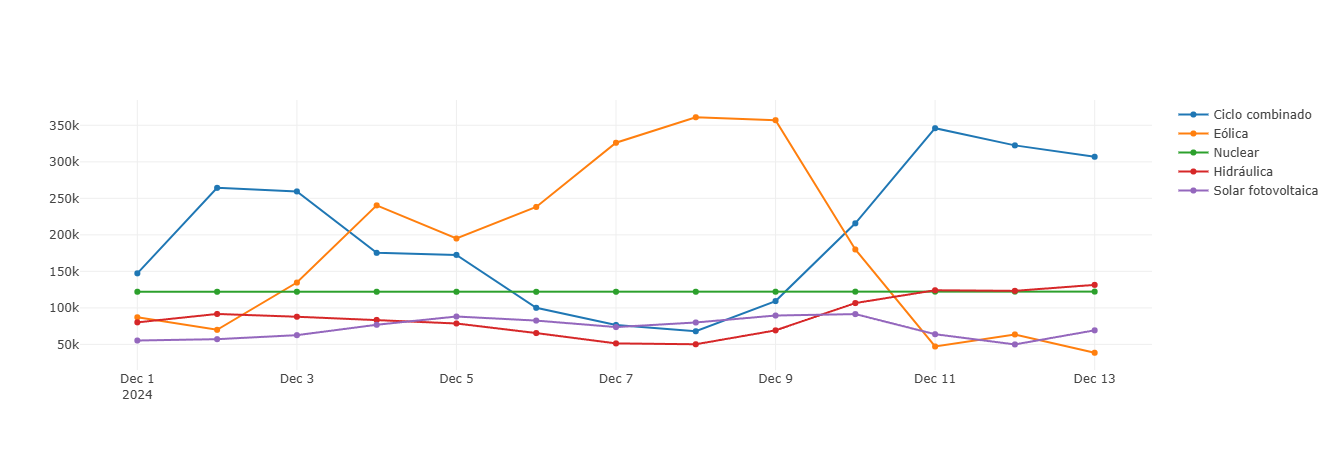

defined function AnalisisEnergiasMensual
dataFrameBalance2024: Dataset[Row] = [Familia: string, Tipo: string ... 5 more fields]
EnergiasParaAnalizar: Seq[String] = WrappedArray(
  "Ciclo combinado",
  "E\u00f3lica",
  "Nuclear",
  "Hidr\u00e1ulica",
  "Solar fotovoltaica"
)

In [9]:
def AnalisisEnergiasMensual(listaEnergias: Seq[String], df: DataFrame): Unit = {
  val seqFechas = df.orderBy("Fecha").select("Fecha").distinct.as[String].collect.toSeq
  val seqValores = listaEnergias.map(energia => df.filter($"Tipo" === energia).orderBy("Fecha").select("Valor").as[Double].collect.toSeq)

  val traces = listaEnergias.zip(seqValores).map { case (nombre, seqValor) =>
    Scatter(seqFechas, seqValor, name = nombre)
  }

  val data = traces
  plot(data)
}

val dataFrameBalance2024 = datosBalance.filter(date_format(col("Fecha"),"yyyy-MM").isin("2024-12")) //Elegimos año
val EnergiasParaAnalizar = datosBalance
    .filter($"Compuesto" === false)
    .filter($"Familia" =!= "Demanda")
    .filter(date_format($"Fecha", "yyyy-MM") === "2024-12")
    .groupBy($"Tipo")
    .agg(sum($"Valor"))
    .orderBy(desc("sum(Valor)"))
    .select("Tipo")
    .limit(5)
    .as[String]
    .collect()
    .toSeq

AnalisisEnergiasMensual(EnergiasParaAnalizar, dataFrameBalance2024)

In [3]:
val filePath = "../../data/parquet/dsDemandaNacional14-24.parquet"   

val datosDemanda: DataFrame = spark.read
  //.option("header", "true") // Si el archivo tiene un encabezado
  //.option("inferSchema", "true") // Para inferir automáticamente el esquema
  //.csv(filePath)
    .parquet(filePath)

parquet at cmd2.sc:7

1 / 1

filePath: String = "../../data/parquet/dsDemandaNacional14-24.parquet"
datosDemanda: DataFrame = [Fecha: timestamp, Valor_previsto: bigint ... 5 more fields]

In [4]:
datosDemanda
    .c
    .show()

show at cmd3.sc:1

15 / 15

+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+
|              Fecha|Valor_previsto|Porcentaje_previsto|Valor_programado|Porcentaje_programado|Valor_real|    Porcentaje_real|
+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+
|2024-10-30 20:35:00|         30260| 0.5039385814445351|           29787|   0.4960614185554649|      null|               null|
|2024-10-30 20:30:00|         30491| 0.5058396098078901|           29787|   0.4941603901921099|      null|               null|
|2024-10-30 20:25:00|         30716| 0.3335070575461455|           30701|   0.3333441910966341|     30683| 0.3331487513572204|
|2024-10-30 20:20:00|         30912| 0.3343428225317989|           30701|   0.3320606558795535|     30843|0.33359652158864755|
|2024-10-30 20:15:00|         31079|0.33568797727444566|           30701|  0.33160515429398485|     30803| 0.33

In [ ]:
def analisisProduccionGeneral (df: DataFrame): Unit = {
    //Calculamos la generacion total por año
    val sumaDemanda = df
      .groupBy(date_format(col("Fecha"), "yyyy").as("Año"))
      .agg(sum("Valor_previsto").as("Valor total previsto"))
      .orderBy($"Año")
      .withColumn("Valor total millones MWh", round(col("Valor total previsto") / 1e6, 2))
    
    sumaDemanda.show()
    
    //Pintamos la gráfica
    val fechas = sumaDemanda.select("Año").as[String].collect.toSeq
    val valorDemandaReal = sumaDemanda.select("Valor total previsto").as[Double].collect.toSeq
    val demandaPorAño = Scatter(fechas, valorDemandaReal, name = "Demanda Total")

    val data = Seq(demandaPorAño)
    plot(data)
    
}
analisisProduccionGeneral(datosDemanda)

show at cmd4.sc:9

15 / 15

show at cmd4.sc:9

200 / 200

+----+--------------------+------------------------+
| Año|Valor total previsto|Valor total millones MWh|
+----+--------------------+------------------------+
|2014|          1460459836|                 1460.46|
|2015|          1469292858|                 1469.29|
|2016|          1502105618|                 1502.11|
|2017|          1516500506|                  1516.5|
|2018|          1527687242|                 1527.69|
|2019|          1499992614|                 1499.99|
|2020|          1427351433|                 1427.35|
|2021|          1463735053|                 1463.74|
|2022|          2272548260|                 2272.55|
|2023|          2751631627|                 2751.63|
|2024|          2647781021|                 2647.78|
+----+--------------------+------------------------+



collect at cmd4.sc:12 
 (kill)

0 + 11 / 15

In [ ]:
datosDemanda.show()

In [6]:
val datosFilomena = datosDemanda.filter(date_format($"Fecha", "yyyy-MM-dd").isin("2021-01-08", "2021-01-09")).orderBy(desc("Fecha"))

datosFilomena: Dataset[Row] = [Fecha: timestamp, Valor_previsto: bigint ... 5 more fields]

In [ ]:
def demandaHistoricoPromedioPorHora(dfDemanda: DataFrame): Unit = {
    val df = dfDemanda.filter($"Porcentaje_real".isNotNull)
    val seqFechas = df.select("Fecha").distinct.as[String].collect.toSeq
    val seqPrevisto = df.select("Valor_previsto").as[Double].collect.toSeq
    val seqProgramado = df.select("Valor_programado").as[Double].collect.toSeq
    val seqReal = df.select("Valor_real").as[Double].collect.toSeq

    val trace1 =  Scatter(seqFechas, seqPrevisto, name = "Valor_previsto")
    val trace2 =  Scatter(seqFechas, seqProgramado, name = "Valor_programado")
    val trace3 =  Scatter(seqFechas, seqReal, name = "Valor_real")


    val data = Seq(trace1, trace2, trace3)
    plot(data)
}
demandaHistoricoPromedioPorHora(datosFilomena)

collect at cmd6.sc:3

15 / 15

collect at cmd6.sc:3

15 / 15

collect at cmd6.sc:3

15 / 15

collect at cmd6.sc:3

15 / 15

collect at cmd6.sc:3

200 / 200

collect at cmd6.sc:3

200 / 200

collect at cmd6.sc:4

15 / 15

collect at cmd6.sc:4

15 / 15

collect at cmd6.sc:4

15 / 15

collect at cmd6.sc:4

15 / 15

collect at cmd6.sc:4

200 / 200

collect at cmd6.sc:4

200 / 200

collect at cmd6.sc:5

15 / 15

collect at cmd6.sc:5

15 / 15

collect at cmd6.sc:5

15 / 15

collect at cmd6.sc:5

15 / 15

collect at cmd6.sc:5 
 (kill)

45 + 19 / 200

collect at cmd6.sc:5 
 (kill)

45 + 19 / 200

In [4]:
val datosEnriquecidos = datosDemanda
    .withColumn("Error_Previsto_Real", abs(col("Valor_previsto") - col("Valor_real")))
    .withColumn("Error_Programado_Real", abs(col("Valor_programado") - col("Valor_real")))
    .withColumn("ErrorRelativo_Previsto_Real", round((abs(col("Valor_previsto") - col("Valor_real")) / col("Valor_real")) * 100, 2))
    .withColumn("ErrorRelativo_Programado_Real", round((abs(col("Valor_programado") - col("Valor_real")) / col("Valor_real")) * 100, 2))
    .withColumn("Critico", col("Valor_real") > col("Valor_previsto") * 1.1)
    .withColumn("DemandaNoCubierta", when(col("Valor_real") > col("Valor_programado"), col("Valor_real") - col("Valor_programado")).otherwise(0))


datosEnriquecidos: DataFrame = [Fecha: timestamp, Valor_previsto: bigint ... 11 more fields]

In [5]:
datosEnriquecidos.show()

show at cmd4.sc:1

1 / 1

show at cmd4.sc:1

1 / 1

+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+-------------------+---------------------+---------------------------+-----------------------------+-------+-----------------+
|              Fecha|Valor_previsto|Porcentaje_previsto|Valor_programado|Porcentaje_programado|Valor_real|    Porcentaje_real|Error_Previsto_Real|Error_Programado_Real|ErrorRelativo_Previsto_Real|ErrorRelativo_Programado_Real|Critico|DemandaNoCubierta|
+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+-------------------+---------------------+---------------------------+-----------------------------+-------+-----------------+
|2023-01-31 13:55:00|         32335| 0.3353418236123787|           31997|  0.33183647224757323|     32092|0.33282170414004814|                243|                   95|                       0.76|                          0.3|  false|       

In [16]:
datosEnriquecidos.orderBy(desc("ErrorRelativo_Programado_Real")).select($"Fecha", $"ErrorRelativo_Programado_Real", $"Critico", $"DemandaNoCubierta").show()

show at cmd15.sc:1

15 / 15

+-------------------+-----------------------------+-------+-----------------+
|              Fecha|ErrorRelativo_Programado_Real|Critico|DemandaNoCubierta|
+-------------------+-----------------------------+-------+-----------------+
|2016-01-25 06:00:00|                        14.52|  false|                0|
|2015-12-09 06:00:00|                        14.17|  false|                0|
|2019-12-16 05:00:00|                        13.76|  false|                0|
|2019-02-11 06:00:00|                        13.58|  false|                0|
|2017-12-04 06:00:00|                        13.35|  false|                0|
|2015-07-01 22:10:00|                        13.21|   true|             3894|
|2020-02-03 05:00:00|                        13.13|  false|                0|
|2016-12-16 06:00:00|                        13.12|  false|                0|
|2014-02-03 06:00:00|                        13.08|  false|                0|
|2020-01-27 06:00:00|                        12.95|  false|     